from https://www.freecodecamp.org/news/signal-processing-and-systems-in-programming/

# Signal Processing

It is important to be able to clean noise from signals and amplify the important information in data. The following are some examples where it is useful to filter out unwanted information:


*   audio signals/music - remove static noise to improve the listening experience
*   image and video - improve the high dynamic range (HDR) or add fun filters
*   medical images - improve the actual signal to be able to make diagnoses
*   speech processing software - parse out human creatable frequencies
*   wireless communications - every bit of data means money with wireless communications so filtering out everything except what is absolutely necessary can save a lot of money



# What is Signal Processing?

A set of tools to manipulate signals to solve problems. This allows engineers to extract only the needed information, or even hidden information from the signal

Some examples include:
*   detecting events in ECG data to determine if someone has an arrythmia
*   filtering out noise so your phone call sounds as clear as possible

Much of signal processing is possible due to the *Fourier Transform* and its very useful properties

In [ ]:
# Example code of filtering a signal

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,1,300, endpoint=False)
x = np.sin(2*np.pi*10*t)
y = 0.5*np.sin(2*np.pi*20*t)
w = 0.2*np.sin(2*np.pi*50*t)
z = x + y + w

zf = np.fft.fft(z) #fourier transform!

N = len(z)
freq = np.fft.fftfreq(N, d=t[1]-t[0]) # discrete fourier transform sample frequencies. N is the window length (in this example, it is the entire length of the signal), d is the sample spacing (time between 2 samples)
spectrum = 2/N * np.abs(zf[:N//2])

#we are creating a band stop filter between frequencies 15 and 60 because we are setting those values to be False (of course we are mirroring about the amplitude axis so we need to include negative frequencies)
mask = np.ones(len(freq), dtype=bool)
mask[(freq > 15) & (freq < 60)] = False
mask[(freq < -15) & (freq > -60)] = False

zf_filtered = zf.copy()
zf_filtered[~mask] = 0 #of course using the not (~) operator in python did the reverse of what we made, so now our filter is a bandpass, allowing only frequencies between 15 and 60

z_filtered = np.fft.ifft(zf_filtered) #inverse fourier transform

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


Text(0.5, 1.0, 'Band Stop filter between 15 and 60 (positive frequencies)')

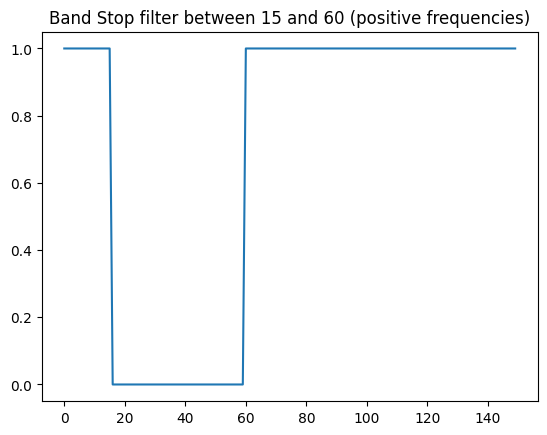

In [ ]:
mask_int = np.multiply(np.array(mask), 1)
print(mask_int)
plt.plot(freq[:N//2], mask_int[:N//2])
plt.title('Band Stop filter between 15 and 60 (positive frequencies)')

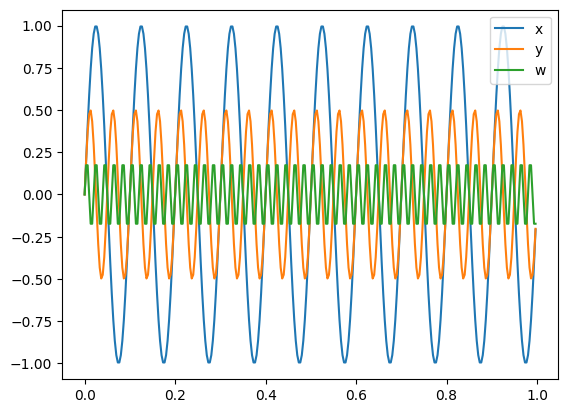

In [ ]:
plt.plot(t,x)
plt.plot(t,y)
plt.plot(t,w)
plt.legend(['x', 'y', 'w'])

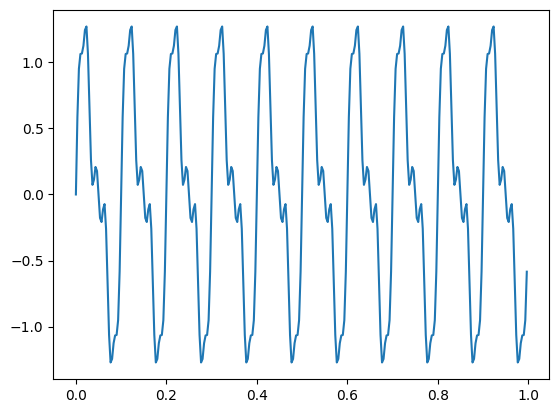

In [ ]:
plt.plot(t,z)

Text(0.5, 1.0, 'Positive Frequencies of z')

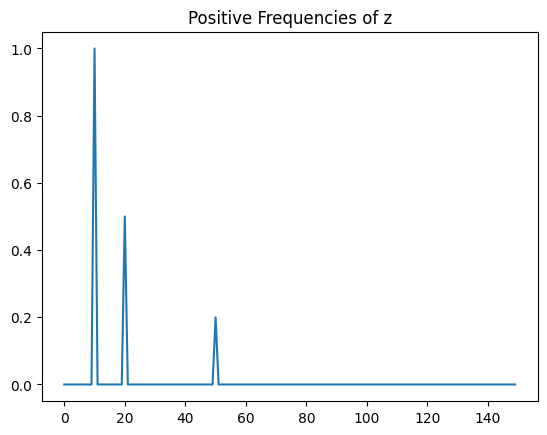

In [ ]:
plt.plot(freq[:N//2], spectrum)
plt.title('Positive Frequencies of z')

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


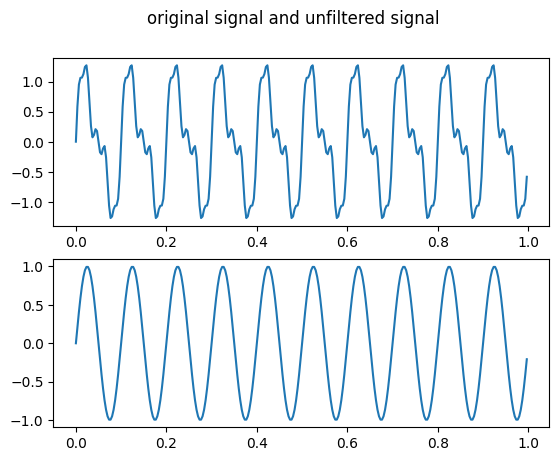

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('original signal and unfiltered signal')
axs[0].plot(t, z)
axs[1].plot(t, z_filtered)

Applying a band stop filter between 15 and 60 filters out the y and w signals